## Task Title:
Heart Disease Prediction Using Machine Learning
##Objective:
Develop a machine learning model that predicts the likelihood of heart disease based on patient health
data and demographic attributes.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv('/content/heart_disease_dataset.csv')
#df.head()
df.isnull().sum()
print(df.dtypes)

Age                         int64
Gender                     object
Cholesterol                 int64
Blood Pressure              int64
Heart Rate                  int64
Smoking                    object
Alcohol Intake             object
Exercise Hours              int64
Family History             object
Diabetes                   object
Obesity                    object
Stress Level                int64
Blood Sugar                 int64
Exercise Induced Angina    object
Chest Pain Type            object
Heart Disease               int64
dtype: object


In [ ]:
df["Alcohol Intake"] = df["Alcohol Intake"].fillna("NOP")
#df.isnull().sum()

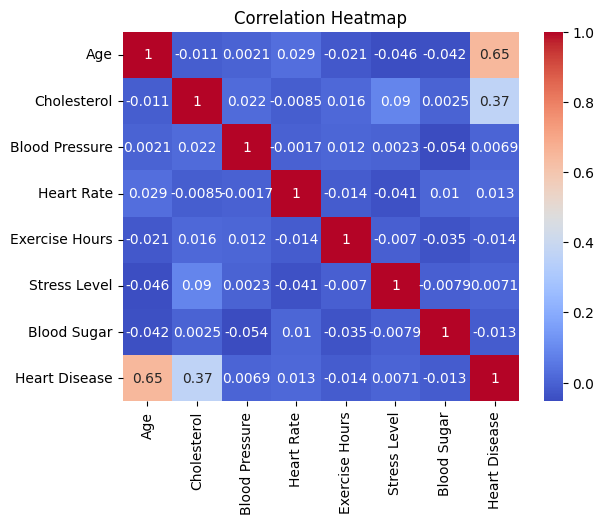

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

X_encoded = X.copy()
label_encoders = {}

for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))




Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       118
           1       0.84      0.82      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200

Confusion Matrix:
 [[105  13]
 [ 15  67]]
ROC-AUC Score: 0.8534518396031416

Decision Tree
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[118   0]
 [  0  82]]
ROC-AUC Score: 1.0

Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.

In [ ]:
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

# 9. Evaluation of Tuned Random Forest
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nTuned Random Forest:")
print("Best Parameters:", grid.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_best))


Tuned Random Forest:
Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[118   0]
 [  0  82]]
ROC-AUC Score: 1.0


In [ ]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Check for any overlap
print("Any overlap in training and test data?", np.any(np.isin(X_train, X_test)))


Train shape: (800, 15)
Test shape: (200, 15)
Any overlap in training and test data? True


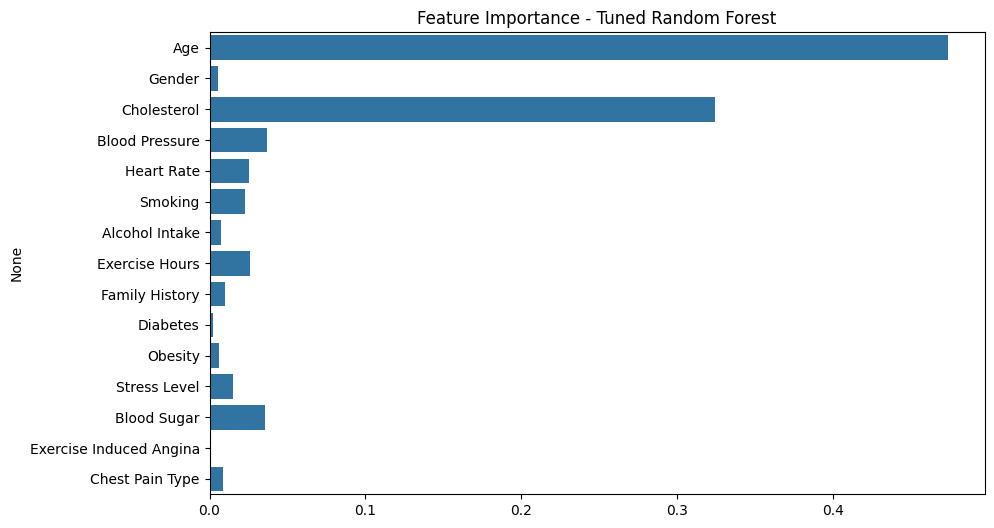

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = best_model.feature_importances_
features = X_encoded.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance - Tuned Random Forest")
plt.show()
